## Временные ряды

[yandex_practicum](https://practicum.yandex.ru/learn/data-scientist/courses/690358eb-b995-45f6-bde0-6260f7ad4df8/sprints/176084/topics/ebc5bf17-addf-4eb7-8b06-ea41ae29ae9d/lessons/21f5da6c-cbdf-401b-b5d7-aacb97f05b68/)

### Ресемплирование, 

или ресемплинг (англ. resample, «повторная выборка»), — это изменение интервала со значениями ряда. 

Его выполняют в два этапа:

1) Выбирают новую длину интервала. Причём значения из текущего интервала группируются. Допустим, интервал равен 10 минутам. Возьмём новый интервал — 30 минут. В него попадут значения из трёх 10-минутных интервалов.

2) В каждой группе вычисляется агрегированное значение ряда. Это может быть медиана, среднее, максимум или минимум.

,PJME_MW
Datetime,
2002-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2003-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2004-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2005-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2006-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2007-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2008-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2009-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"
2010-12-31,"AxesSubplot(0.125,0.2;0.775x0.68)"


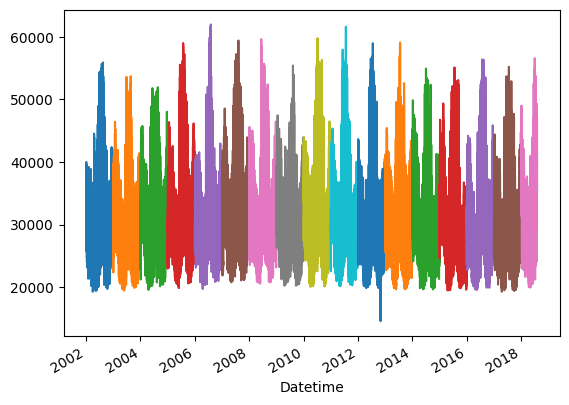

In [2]:
import pandas as pd

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)

data = data.resample('1Y')      # ресэмплирование по годам
data.plot()

<AxesSubplot: xlabel='Datetime'>

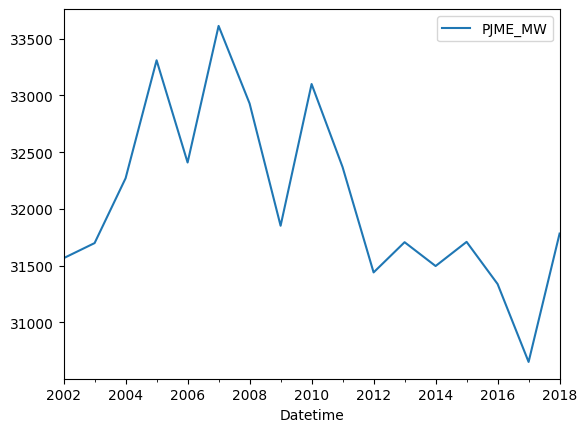

In [3]:
import pandas as pd

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)

data = data.resample('1Y').mean()      # ресэмплирование по годам с поиском среднего энергопотребления 
data.plot()

Постройте график энергопотребления с января по июнь 2018 года. 

Выберите интервал в один день, по каждому — вычислите суммарное энергопотребление.


<AxesSubplot: xlabel='Datetime'>

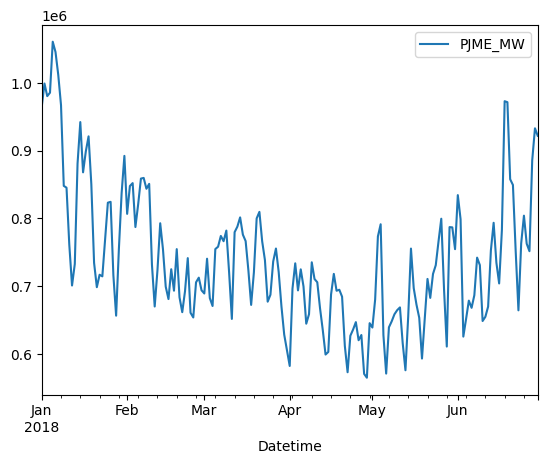

In [5]:
data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)

data = data['2018-01': '2018-06'].resample('1D').sum()
data.plot()

### Скользящее среднее


Скользящее среднее (англ. rolling mean), или движущееся среднее (англ. moving average), — метод сглаживания временных рядов. Его суть заключается в поиске значений, которые меньше всего подвержены колебаниям, то есть средних арифметических.

Метод работает так: экспериментально подбирается размер окна (англ. window size) — интервал, в котором выполняют усреднение. Чем интервал больше, тем сильнее сглаживание. Затем окно начинает «скользить» почти от начала ряда к его концу, в каждой точке вычисляя среднее значение ряда и тем самым сглаживая его.

В скользящем среднем окна «наслаиваются» друг на друга и не могут выходить за пределы ряда. Поэтому средних будет чуть меньше, чем исходных значений ряда.

Добавьте в столбец 'rolling_mean' скользящее среднее с размером окна, равным 10. 

Выведите на экран графики энергопотребления с января по июнь 2018 года и скользящего среднего (уже в прекоде).

<AxesSubplot: xlabel='Datetime'>

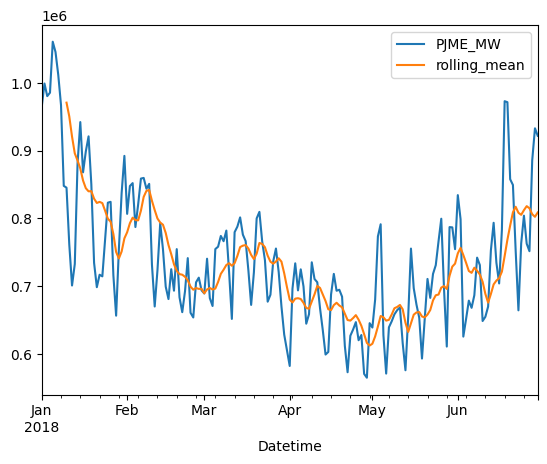

In [6]:
data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
data['rolling_mean'] = data.rolling(10).mean() 
data.plot()

### Тренды и сезонность
Чтобы лучше понимать временной ряд, разберём тренды и сезонность.

Тренд (англ. trend) — плавное изменение среднего значения ряда без повторяющихся закономерностей. Например, ежегодное увеличение объёма продаж авиабилетов.

Сезонность (англ. seasonality) — циклично повторяющиеся закономерности во временном ряду. Допустим, рост продаж авиабилетов летом.

Тренды и сезонность зависят от масштаба данных. Нельзя увидеть закономерности, повторяющиеся каждое лето, если есть данные только за год. 

    Посмотрим на график rolling_mean выше:
- Увеличение энергопотребления зимой и летом — это тренд.

- Если эти данные анализировать в масштабе нескольких лет, рост энергопотребления зимой и летом — это уже сезонные изменения.

В модуле tsa.seasonal (от англ. time series analysis, «анализ временных рядов») библиотеки statsmodels (англ. «статистические модели») есть функция seasonal_decompose() (англ. «разбить на части»). 

Она раскладывает временной ряд на три составляющие: 
- тренд,
- сезонность
- и остаток (англ. residuals). Это компонента, которая не объясняется трендом и сезонностью, это шум.

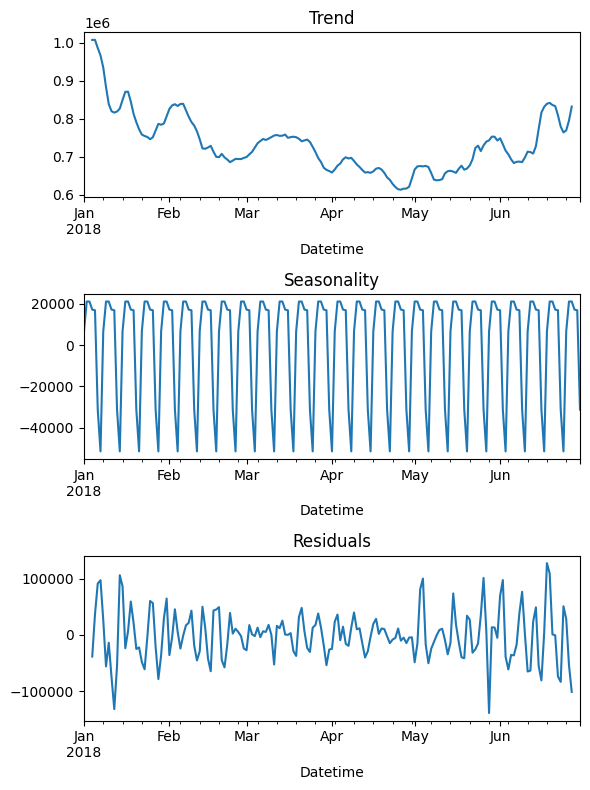

In [8]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()

decomposed = seasonal_decompose(data) 

plt.figure(figsize=(6, 8))
plt.subplot(311)

# расположить графики друг под другом 
# корректные оси графиков

# Чтобы график корректно отобразился, указываем его оси ax, равными plt.gca() (англ. get current axis, получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

Постройте график сезонной составляющей за первые 15 дней января 2018 года.

Text(0.5, 1.0, 'Seasonality')

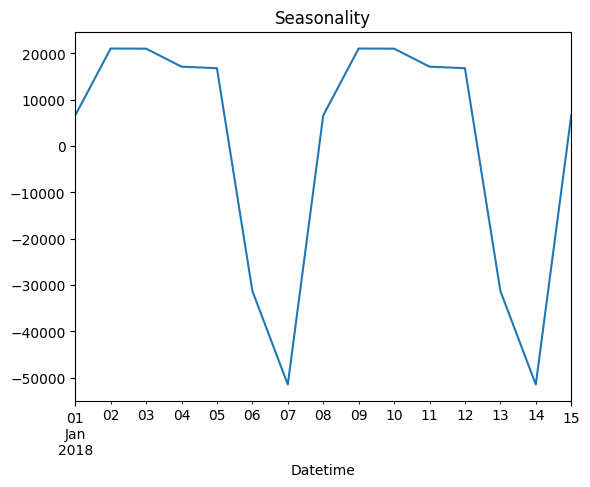

In [9]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()

decomposed = seasonal_decompose(data)



decomposed.seasonal['2018-01-01':'2018-01-15'].plot() 
plt.title('Seasonality')

### Стационарные ряды
Прогнозировать данные помогают стационарные ряды. Разберёмся, что это такое.

В задаче потребления электроэнергии найдём скользящее стандартное отклонение (англ. rolling standard deviation, rolling std) — стандартное отклонение по скользящему окну:

<AxesSubplot: xlabel='Datetime'>

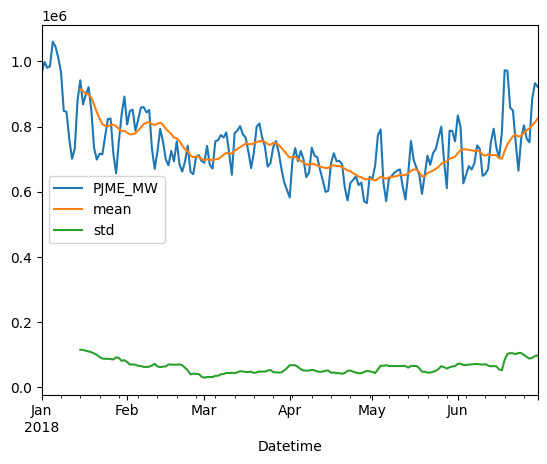

In [10]:
import pandas as pd

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()
data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot()

В статистике временной ряд описывается стохастическим процессом (англ. stochastic process). Это случайная величина, у которой со временем меняется её распределение. У этой величины есть среднее и дисперсия, которые тоже меняются.

    Стохастический процесс стационарный (англ. stationary stochastic process), если его распределение со временем не меняется.

    Если распределение меняется, то процесс называется нестационарным (англ. nonstationary stochastic process).

### Разности временного ряда
Чтобы ряд сделать стационарным, найдём разности его значений.

Разности временного ряда (англ. time series difference) — это набор разностей между соседними элементами временного ряда, т. е. из каждого значения вычитается предыдущее.

Для поиска разностей временного ряда применяется метод shift() (англ. «сдвиг»). Все значения он сдвигает вдоль временной оси на один шаг вперёд:

<AxesSubplot: xlabel='Datetime'>

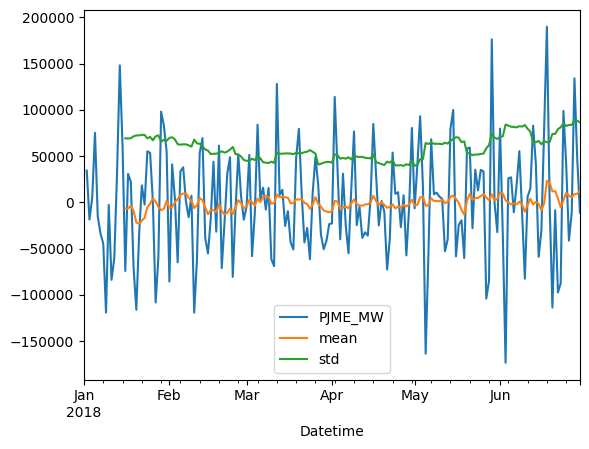

In [11]:
# Вычислите разности временного ряда. Пропущенные значения заполнять не нужно. 
# На графике изобразите скользящее среднее и скользящее стандартное отклонение (уже в прекоде).

import pandas as pd

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()

data = data - data.shift()  # разность ряда БЕЗ заполнения пропущенного значения (без использования fill_value=0)

data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot()

### Задача прогнозирования
Разберём задачу прогнозирования временных рядов.

Задача прогнозирования временного ряда состоит в построении модели, которая по историческим данным предскажет будущие значения временного ряда.
Промежуток времени в будущем, на который строится прогноз, называется горизонтом прогнозирования (англ.  forecast horizon). В задачах этой темы он будет равен одному шагу.

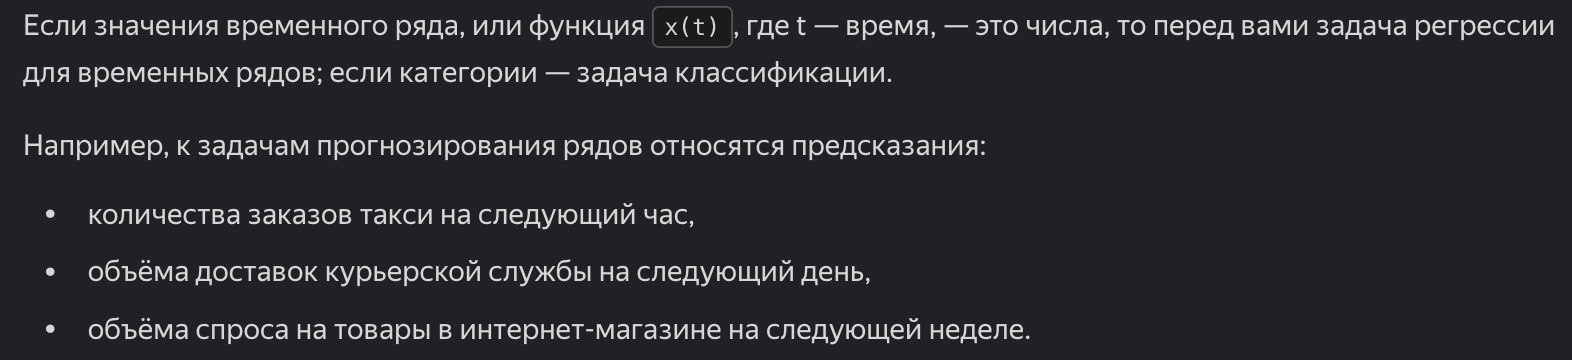

По исходным данным создадим обучающую (train) и тестовую (test) выборки. 

    Перемешивать выборки в задаче прогнозирования временного ряда нельзя. Данные обучающей выборки должны предшествовать данным тестовой. Иначе тестирование модели будет некорректным: модель не должна обучаться на данных из будущего.

Функция train_test_split() из модуля sklearn.model_selection по умолчанию перемешивает данные. Поэтому укажем аргумент **shuffle** (с англ. «перетасовывать») равным False, чтобы разделить данные корректно:

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data.resample('1D').sum()

train, test = train_test_split(data, test_size=0.2, shuffle=False)  # гарантируем исключение перемешивания данных

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2002-01-01 00:00:00 2015-04-09 00:00:00
2015-04-10 00:00:00 2018-08-03 00:00:00


#### Качество прогноза
Научимся измерять качество предсказания временных рядов и проверять модели на адекватность.

Обучим модель с горизонтом прогнозирования в один день. Такие модели пригодятся в автоматизации принятия технических решений. Например, в задаче энергопотребления модель поможет изменять режим работы генераторов автоматически.

Чтобы проверять качество моделей в наших задачах, возьмём метрику MAE. Её можно легко интерпретировать.

Спрогнозировать временные ряды без обучения можно двумя способами:
1) Все значения тестовой выборки предсказываются одним и тем же числом (константой). Для метрики MAE — это медиана.

2) Новое значение x(t) прогнозируется предыдущим значением ряда, то есть x(t-1). Этот способ не зависит от метрики.

In [17]:
# Оцените модель первым способом — прогнозом константой. 
# Дневной объём электропотребления предскажите медианой, сохраните значения в переменной pred_median и найдите для этого прогноза значение MAE. 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data.resample('1D').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.2)


print("Средний объём электропотребления в день:", test['PJME_MW'].mean())

pred_median = np.ones(test.shape) * train['PJME_MW'].median()   # считаем медиану для тренировочной выборки 
                                                                # и создаем массив размером тестовой выборки, заполненной ТОЛЬКО медианой тренировочной выборки

print("MAE:", mean_absolute_error(test, pred_median))

Средний объём электропотребления в день: 745523.4529702971
MAE: 96625.08333333333


Оцените модель вторым способом — предыдущим значением ряда. Предскажите дневной объём электропотребления и найдите для этого прогноза значение MAE.

В прекоде указан средний объём электропотребления, чтобы вы смогли соотнести его со значением метрики MAE.

Напечатайте на экране значения среднего объёма электропотребления и метрики MAE (уже в прекоде).

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data.resample('1D').sum()

train, test = train_test_split(data, shuffle=False, test_size=0.2)

print("Средний объём электропотребления в день:", test['PJME_MW'].mean())

pred_previous = test.shift(fill_value=train.iloc[-1,-1])

print("MAE:", mean_absolute_error(test, pred_previous))

Средний объём электропотребления в день: 745523.4529702971
MAE: 44941.65924092409


In [23]:
train.tail()

,PJME_MW
Datetime,
2015-04-05,589860.0
2015-04-06,647920.0
2015-04-07,652268.0
2015-04-08,699265.0
2015-04-09,732847.0


In [35]:
train.iloc[-1,-1]

732847.0

При таком прогнозе модель ошибается меньше. Проверка на адекватность есть — а это ориентир. 

#### Создание признаков
Создадим признаки для горизонта прогнозирования в один шаг.

Напишем функцию для создания признаков. Разберём каждый тип признаков:
1. Календарные признаки (англ. calendar features): год, месяц, день недели и пр

2. «Отстающие значения» (англ. lag features)
    - Предыдущие значения временного ряда подскажут, будет ли функция x(t) расти или уменьшаться. Получим отстающие значения знакомой функцией shift():

In [37]:
data['lag_1'] = data['PJME_MW'].shift(1)
data['lag_2'] = data['PJME_MW'].shift(2)
data['lag_3'] = data['PJME_MW'].shift(3)

print(data.head(10))

             PJME_MW     lag_1     lag_2     lag_3
Datetime                                          
2002-01-01  714857.0       NaN       NaN       NaN
2002-01-02  822277.0  714857.0       NaN       NaN
2002-01-03  828285.0  822277.0  714857.0       NaN
2002-01-04  809171.0  828285.0  822277.0  714857.0
2002-01-05  729723.0  809171.0  828285.0  822277.0
2002-01-06  727766.0  729723.0  809171.0  828285.0
2002-01-07  800012.0  727766.0  729723.0  809171.0
2002-01-08  824710.0  800012.0  727766.0  729723.0
2002-01-09  810628.0  824710.0  800012.0  727766.0
2002-01-10  755317.0  810628.0  824710.0  800012.0


3. Скользящее среднее
    - Скользящее среднее как признак задаёт общий тренд временного ряда. Повторим, как его вычислять:

In [38]:
data['rolling_mean'] = data['PJME_MW'].rolling(5).mean()    # так делать нельзя! целевой признак не должен попадать в размер окна!

print(data.head(10))

             PJME_MW     lag_1     lag_2     lag_3  rolling_mean
Datetime                                                        
2002-01-01  714857.0       NaN       NaN       NaN           NaN
2002-01-02  822277.0  714857.0       NaN       NaN           NaN
2002-01-03  828285.0  822277.0  714857.0       NaN           NaN
2002-01-04  809171.0  828285.0  822277.0  714857.0           NaN
2002-01-05  729723.0  809171.0  828285.0  822277.0      780862.6
2002-01-06  727766.0  729723.0  809171.0  828285.0      783444.4
2002-01-07  800012.0  727766.0  729723.0  809171.0      778991.4
2002-01-08  824710.0  800012.0  727766.0  729723.0      778276.4
2002-01-09  810628.0  824710.0  800012.0  727766.0      778567.8
2002-01-10  755317.0  810628.0  824710.0  800012.0      783686.6


Все разом для создания признаков

In [40]:
import pandas as pd
import numpy as np


data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data.resample('1D').sum()

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['PJME_MW'].shift(lag)
    
    data['rolling_mean'] = data['PJME_MW'].shift(1).rolling(rolling_mean_size).mean()   # решение проблемы с попаданием целевого признака 
                                                                                        # в предсказываемое значение:
                                                                                        # просто сдвигаем ряд на единицу!
   

make_features(data, 4, 4)
print(data.head())

             PJME_MW  year  month  day  dayofweek     lag_1     lag_2  \
Datetime                                                                
2002-01-01  714857.0  2002      1    1          1       NaN       NaN   
2002-01-02  822277.0  2002      1    2          2  714857.0       NaN   
2002-01-03  828285.0  2002      1    3          3  822277.0  714857.0   
2002-01-04  809171.0  2002      1    4          4  828285.0  822277.0   
2002-01-05  729723.0  2002      1    5          5  809171.0  828285.0   

               lag_3     lag_4  rolling_mean  
Datetime                                      
2002-01-01       NaN       NaN           NaN  
2002-01-02       NaN       NaN           NaN  
2002-01-03       NaN       NaN           NaN  
2002-01-04  714857.0       NaN           NaN  
2002-01-05  822277.0  714857.0      793647.5  


#### Обучение модели
Обучим линейную регрессию с учётом новых признаков.

Разделим данные на обучающую и тестовую выборки. Отстающие значения и скользящее среднее вычисляются по прошлым данным. Признаки для первых значений тестовой выборки находятся в конце обучающей выборки.

Получить признаки для первых значений обучающей выборки нельзя: исторических данных по ним нет. В предыдущих задачах значения этих признаков были NaN. Их нужно удалить.

Подберите аргументы функции make_features() так, чтобы значение MAE на тестовой выборке было не больше 37 000.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

data.sort_index(inplace=True)
data = data.resample('1D').sum()

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['PJME_MW'].shift(lag)

    data['rolling_mean'] = data['PJME_MW'].shift().rolling(rolling_mean_size).mean()



make_features(data, 1, 1)

data.dropna(inplace=True)

X = data.drop('PJME_MW', axis=1)
y = data['PJME_MW']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()

model.fit(X_train, y_train)

print("MAE обучающей выборки:", mean_absolute_error(y_train, model.predict(X_train)))
print("MAE тестовой выборки:", mean_absolute_error(y_test, model.predict(X_test)))

MAE обучающей выборки: 35922.80967204933
MAE тестовой выборки: 39180.71797679798


In [49]:

mae_score = 39_180
while mae_score>=37_000:
    for lag in range(2,10):
        for rms in range(2,10):
            data = pd.read_csv('https://code.s3.yandex.net//datasets/energy_consumption.csv', index_col=[0], parse_dates=[0])

            data.sort_index(inplace=True)
            data = data.resample('1D').sum()

            make_features(data, lag, rms)

            data.dropna(inplace=True)

            X = data.drop('PJME_MW', axis=1)
            y = data['PJME_MW']

            X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

            model = LinearRegression()

            model.fit(X_train, y_train)

            mae_score = mean_absolute_error(y_test, model.predict(X_test))


print(f'lag = {lag}, rolling_mean_size = {rms}')

print("MAE обучающей выборки:", mean_absolute_error(y_train, model.predict(X_train)))
print("MAE тестовой выборки:", mean_absolute_error(y_test, model.predict(X_test)))



lag = 9, rolling_mean_size = 9
MAE обучающей выборки: 32389.791617717365
MAE тестовой выборки: 35871.78184037976


Получили через цикл подходящие значения метрики